In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sampleCassini(N, e, a = 1):
    def r(theta):
        return a*math.sqrt(math.cos(2*theta) + math.sqrt(e**4 - 1 + math.cos(2*theta)**2))
    angles = 2*math.pi*np.random.rand(N)
    Xpolar = [[theta, r(theta)] for theta in angles]
    X = np.array([[x[1]*math.cos(x[0]), x[1]*math.sin(x[0])] for x in Xpolar])
    return X

def plotCassini(X):
    plt.rcParams['figure.figsize'] = (5, 5)
    plt.axis('equal')
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], s = 1, color = 'k')

In [ ]:
X = sampleCassini(200, 1.01)
np.save('cassini.npy', X)

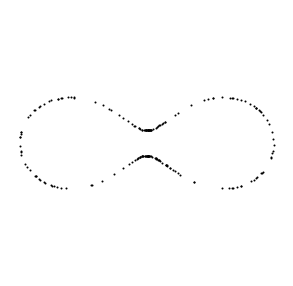

In [2]:
X = np.load('cassini.npy')
plotCassini(X)

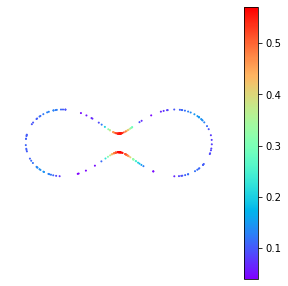

In [11]:
import DVR
DVR.plot_density(points = X, n = 1, s = 1)

Euclidean balls vs. density-weighted balls

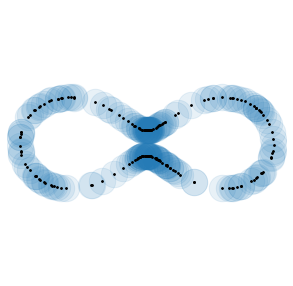

In [7]:
plt.axis('equal')
plt.axis('off')
plt.scatter(X[:, 0], X[:, 1], s = 700, alpha = .1)
plt.scatter(X[:, 0], X[:, 1], s = 3, color = 'k')

In [9]:
N = X.shape[0]
f_est = DVR.f_estimator(1, points = X)
density = f_est.density()
radii = np.array([1/(DVR.alpha(1, N)*density[i]) for i in range(N)])

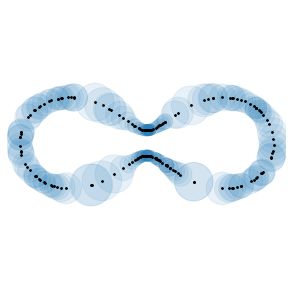

In [10]:
plt.axis('equal')
plt.axis('off')
plt.scatter(X[:N, 0], X[:N, 1], s = 500*radii, alpha = .1)
plt.scatter(X[:N, 0], X[:N, 1], s = 3, color = 'k')

Gknn graph

Set k =  12


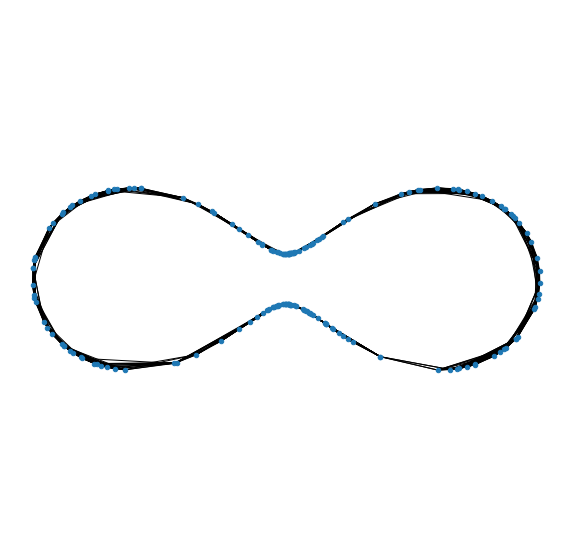

In [26]:
geoest = DVR.Geodist_estimator(X, 1)
geoest.plot_Gknn_unweighted(node_size = 20)
geo_dist = geoest.distance_matrix()

Set k =  12


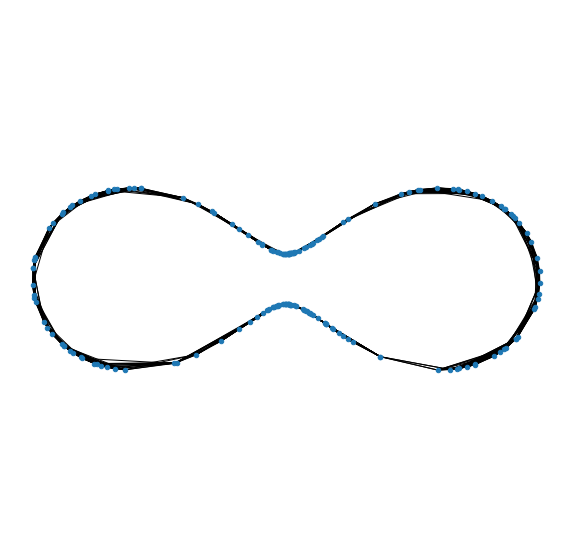

In [9]:
geoest = DVR.Geodist_estimator(X, 1)
geoest.plot_Gknn_unweighted(node_size = 20)
geo_dist = geoest.distance_matrix()

Text(0.5, 1.0, '')

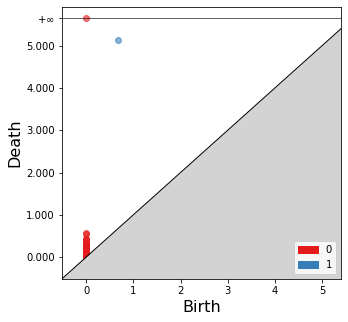

In [10]:
import gudhi as gd

plt.rcParams['figure.figsize'] = (5, 5)
geo_cpx = gd.RipsComplex(distance_matrix = geo_dist).create_simplex_tree(max_dimension = 2)
geo_ph = geo_cpx.persistence()
gd.plot_persistence_diagram(persistence = geo_ph, legend = True)
plt.title("")

In [11]:
print(geo_ph[0])
print(geo_ph[0][1][1] - geo_tri_ph[0][1][0])

(1, (0.6748845609347653, 5.145959458516936))
4.4242922567092275


t = 0


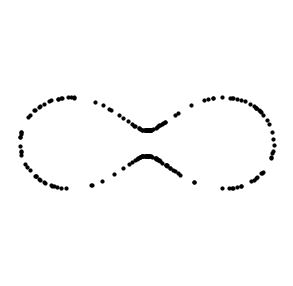

t = 2


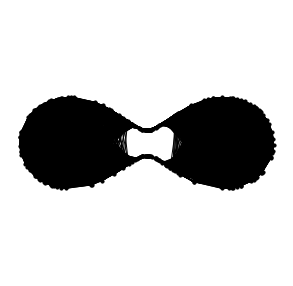

t = 4


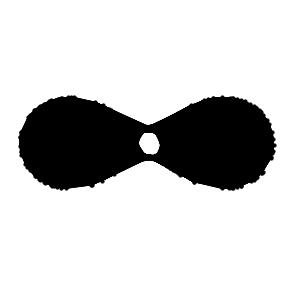

t = 6


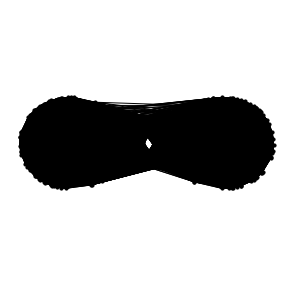

t = 8


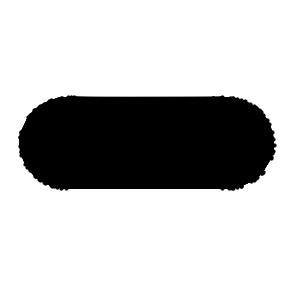

In [39]:
for t in range(0, 9, 2):
    print(f"t = {t}")
    DVR.plot_1skeleton(X, geo_dist, t)
    plt.show()

DVR with triweight kernel

Set k =  12


usetex mode requires ghostscript.


Text(0.5, 1.0, '')

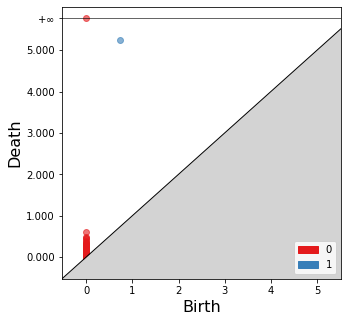

In [5]:
import gudhi as gd
import DVR

plt.rcParams['figure.figsize'] = (5, 5)
geo_tri = DVR.DVR(1, points = X, kernel = DVR.f_estimator.triweight, max_dimension = 2)
geo_tri_ph = geo_tri.persistence()
gd.plot_persistence_diagram(persistence = geo_tri_ph, legend = True)
plt.title("")

In [7]:
print(geo_tri_ph[0])
print(geo_tri_ph[0][1][1] - geo_tri_ph[0][1][0])

(1, (0.7216672018077082, 5.2571319454434615))
4.535464743635753


DVR: Epanechnikov kernel

Set k =  12


Text(0.5, 1.0, '')

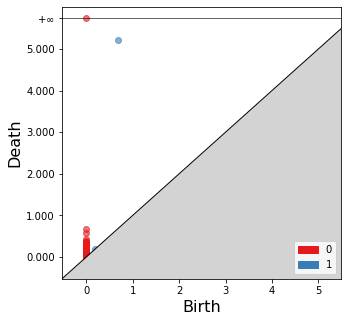

In [7]:
import DVR
import gudhi as gd

geo_cpx_ep = DVR.DVR(1, points = X, max_dimension = 2, kernel = DVR.f_estimator.epanechnikov)
geo_ph_ep = geo_cpx_ep.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_ep, legend = True)
plt.title("")

In [8]:
print(geo_ph_ep[0])
print(geo_ph_ep[0][1][1] - geo_ph_ep[0][1][0])

(1, (0.6748267849533043, 5.2233927637175))
4.548565978764196


Vietoris Rips

usetex mode requires ghostscript.


Text(0.5, 1.0, '')

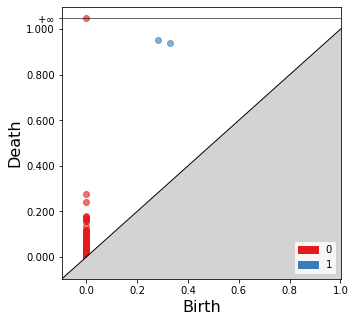

In [24]:
import gudhi as gd
plt.rcParams['figure.figsize'] = (5, 5)
vr_cpx = gd.RipsComplex(points = X).create_simplex_tree(max_dimension = 2)
vr_ph = vr_cpx.persistence()
gd.plot_persistence_diagram(persistence = vr_ph, legend = True)
plt.title("")

knn filtration

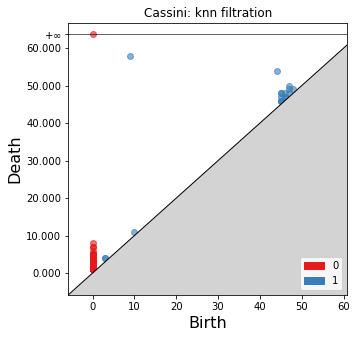

In [29]:
plt.rcParams['figure.figsize'] = (5, 5)
X = np.load('cassini.npy')
knnD = DVR.knn_distance(X)
knn_cpx = gd.RipsComplex(distance_matrix = knnD).create_simplex_tree(max_dimension = 2)
knn_ph = knn_cpx.persistence()
gd.plot_persistence_diagram(persistence = knn_ph, legend = True)
plt.title("Cassini: knn filtration")
plt.show()

t =  0


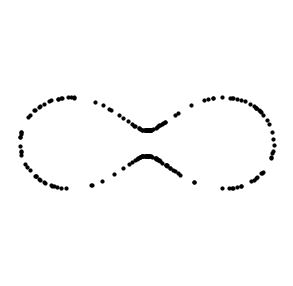

t =  10


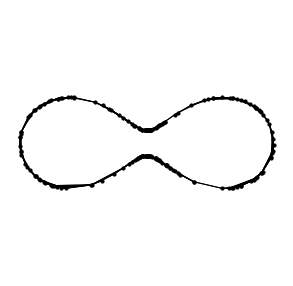

t =  20


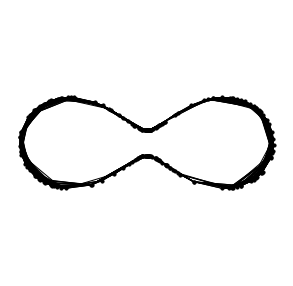

t =  30


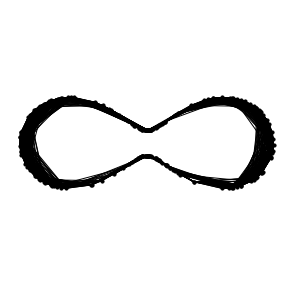

t =  40


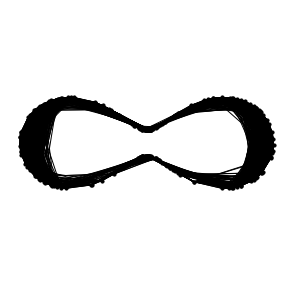

t =  50


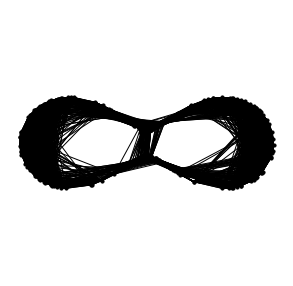

In [30]:
for t in range(0, 60, 10):
    print("t = ", t)
    DVR.plot_1skeleton(X, knnD, t)
    plt.show()